# AIR POLLUTION PREDICTION USING MACHINE LEARNING


In [215]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [216]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [217]:
#Tải thư viện statsmodels 
! pip install statsmodels



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [218]:
## Import libraries
import os
import pickle
from math import sqrt

## Data wrangling and loader
import pandas as pd
import numpy as np

## Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

## Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Testing for stationarity of forecast variable
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

## Regressor - only using as requested
import xgboost as xgb
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Suppressing unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


In [219]:
# File paths
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, "Data")
MODEL_PATH = os.path.join(BASE_DIR, "models")
RESULTS_PATH = os.path.join(BASE_DIR, "results")
CLEANED_DATASET_PATH = os.path.join(BASE_DIR, "cleaned_datasets")
DATASET_PATH = os.path.join(DATA_DIR, "DATASET_state_weather_aqi_data_PPNC.csv")

In [220]:
# Creating appropriate folders if not already existing
if not os.path.exists(MODEL_PATH):
    os.makedirs(MODEL_PATH)

if not os.path.exists(RESULTS_PATH):
    os.makedirs(RESULTS_PATH)

if not os.path.exists(CLEANED_DATASET_PATH):
    os.makedirs(CLEANED_DATASET_PATH)


In [221]:
# Default plotting configurations
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 18

In [222]:
# Import air quality data
aqi_data = pd.read_csv(DATASET_PATH)

# View data shape and basic information
print("Dataset shape:", aqi_data.shape, "\n")
print("Dataset information:\n")

Dataset shape: (1564, 18) 

Dataset information:



In [223]:
aqi_data.info()
print("\nColumn names:", list(aqi_data.columns), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   1564 non-null   object 
 1   district               1564 non-null   object 
 2   DateTime               1564 non-null   object 
 3   PM2.5                  1391 non-null   float64
 4   PM10                   1227 non-null   float64
 5   NO2                    1409 non-null   float64
 6   NH3                    1120 non-null   float64
 7   SO2                    1351 non-null   float64
 8   CO                     1501 non-null   float64
 9   OZONE                  1415 non-null   float64
 10  AQI                    1564 non-null   int64  
 11  TEMP                   1564 non-null   float64
 12  PRES                   1564 non-null   float64
 13  DEWP                   1564 non-null   float64
 14  RAIN                   1564 non-null   float64
 15  wd  

In [224]:
# View data description
print("Dataset statistics:\n")
print(aqi_data.describe())

Dataset statistics:

             PM2.5         PM10          NO2          NH3          SO2  \
count  1391.000000  1227.000000  1409.000000  1120.000000  1351.000000   
mean    182.887132   141.654442    46.735273     8.410714    16.469282   
std     106.309536    66.750720    31.698556     5.592273    12.578891   
min       9.000000    21.000000     1.000000     1.000000     1.000000   
25%      88.000000    93.000000    24.000000     4.000000     8.000000   
50%     164.000000   130.000000    42.000000     7.000000    13.000000   
75%     278.500000   184.500000    64.000000    12.000000    20.000000   
max     441.000000   394.000000   247.000000    34.000000    92.000000   

                CO        OZONE          AQI         TEMP         PRES  \
count  1501.000000  1415.000000  1564.000000  1564.000000  1564.000000   
mean     51.441706    29.792933   188.368286    29.086445  1007.708312   
std      28.032483    22.786605    98.940549     2.978614     2.582796   
min       1.0000

In [225]:
# Check for missing values
print("\nMissing values per column:\n")
print(aqi_data.isna().sum())


Missing values per column:

City                       0
district                   0
DateTime                   0
PM2.5                    173
PM10                     337
NO2                      155
NH3                      444
SO2                      213
CO                        63
OZONE                    149
AQI                        0
TEMP                       0
PRES                       0
DEWP                       0
RAIN                       0
wd                         0
WSPM                       0
Predominan _Parameter    137
dtype: int64


In [226]:
# Clean the dataset by removing null values
clean_aqi_data = aqi_data.dropna()

clean_aqi_data["DateTime"] = pd.to_datetime(clean_aqi_data["DateTime"], format="%m/%d/%Y %H:%M")
clean_aqi_data.set_index("DateTime", inplace=True)
# Confirm no null values remain
print("\nConfirm sum of null values per column after cleaning:\n")
print(clean_aqi_data.isna().sum())
print("\nClean dataset shape:", clean_aqi_data.shape, "\n")


Confirm sum of null values per column after cleaning:

City                     0
district                 0
PM2.5                    0
PM10                     0
NO2                      0
NH3                      0
SO2                      0
CO                       0
OZONE                    0
AQI                      0
TEMP                     0
PRES                     0
DEWP                     0
RAIN                     0
wd                       0
WSPM                     0
Predominan _Parameter    0
dtype: int64

Clean dataset shape: (966, 17) 



In [227]:
# Save the cleaned dataset
clean_aqi_data.to_csv(os.path.join(CLEANED_DATASET_PATH, 'clean_aqi_data.csv'), index=False)

In [228]:
# 1. View first and last few records
print("First 5 records:")
clean_aqi_data.head()

First 5 records:


,City,district,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,TEMP,PRES,DEWP,RAIN,wd,WSPM,Predominan _Parameter
DateTime,,,,,,,,,,,,,,,,,
2024-11-01 01:00:00,TPHCM,Q1,68.0,64.0,17.0,4.0,28.0,31.0,40.0,68,30.0,1009.0,22.0,0.0,130.0,13.0,PM2.5
2024-11-01 02:00:00,TPHCM,Q3,67.0,70.0,23.0,2.0,13.0,49.0,77.0,77,29.0,1009.0,23.1,0.0,149.0,12.8,OZONE
2024-11-01 04:00:00,TPHCM,Tân Bình,93.0,93.0,31.0,3.0,9.0,57.0,61.0,93,29.0,1008.0,23.0,0.0,130.0,16.6,PM10
2024-11-01 05:00:00,TPHCM,Tân Phú,60.0,55.0,20.0,5.0,18.0,29.0,53.0,60,28.9,1008.1,23.2,0.0,140.0,16.4,PM2.5
2024-11-01 06:00:00,TPHCM,Q1,48.0,52.0,25.0,3.0,12.0,43.0,67.0,67,29.0,1009.0,23.0,0.0,130.0,14.8,OZONE


In [229]:
# 1. View records
print("\nLast 5 records:")
clean_aqi_data.tail()


Last 5 records:


,City,district,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,TEMP,PRES,DEWP,RAIN,wd,WSPM,Predominan _Parameter
DateTime,,,,,,,,,,,,,,,,,
2025-01-05 00:00:00,TPHCM,Q6,247.0,167.0,67.0,5.0,12.0,43.0,55.0,247,23.1,1012.0,16.1,0.0,50.0,7.6,PM2.5
2025-01-05 01:00:00,TPHCM,Q9,163.0,142.0,57.0,7.0,10.0,39.0,8.0,163,22.1,1012.0,16.1,0.0,20.0,5.4,PM2.5
2025-01-05 02:00:00,TPHCM,Bình Tân,279.0,215.0,78.0,11.0,23.0,31.0,53.0,279,26.1,1010.0,23.1,0.1,120.0,11.2,PM2.5
2025-01-05 03:00:00,TPHCM,Q1,162.0,136.0,43.0,4.0,16.0,34.0,44.0,162,21.1,1011.0,17.1,0.0,340.0,5.4,PM2.5
2025-01-05 04:00:00,TPHCM,Q4,213.0,152.0,55.0,5.0,11.0,95.0,64.0,213,22.1,1010.0,17.1,0.0,348.6,3.6,PM2.5


In [230]:
# MAPE: Mean absolute Percentage Error
METRICS = ['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'] 

In [231]:
def evaluate_model_performance(y_true, predictions, label='dt'):
    mae = mean_absolute_error(y_true, predictions)
    mse = mean_squared_error(y_true, predictions)
    rmse = sqrt(mean_squared_error(y_true, predictions))
    r2 = r2_score(y_true, predictions)

    sum_y_true = np.sum(y_true)
    MAPE = np.mean(np.abs(y_true - predictions) / y_true)
     
    results = {label: [mae, mse, rmse, r2, MAPE]}
    
    return pd.DataFrame(results, index=METRICS).round(3)

In [232]:
def visualize_features_series(df,  hours=24*31*6, index=-1):
    colors = ['black', 'red', 'blue', 'green', 'gray', 'orange']
    sub_df = df[['TEMP','PRES','DEWP','RAIN','wd','WSPM']]
    
    if index < 0 and hours <= len(sub_df):   # if index is negative, select last 'hours' series
        sub_df = sub_df.iloc[-hours:]
    elif index > 0 and hours <= len(sub_df): # otherwise, select first 'hours' series data
        sub_df = sub_df.iloc[:-hours]

    plt.figure(figsize=(16, 8), dpi=150)
    fig, ax = plt.subplots(len(sub_df.columns), sharex=True)

    for i, col in enumerate(sub_df):
        ax[i].plot(sub_df[col], label=col, color=colors[i])
        ax[i].set_title(col)
    fig.tight_layout()



def visualize_pollutants_series(df, hours=24*31*6, index=-1):
    colors = ['black', 'red', 'blue', 'green', 'gray', 'orange']
    sub_df = df.iloc[:, -6:]

    if index < 0 and hours <= len(sub_df):   # if index is negative, select last 'hours' series
        sub_df = sub_df.iloc[-hours:]
    elif index > 0 and hours <= len(sub_df): # otherwise, select first 'hours' series data
        sub_df = sub_df.iloc[:-hours]

    plt.figure(figsize=(16, 8), dpi=150)
    fig, ax = plt.subplots(len(sub_df.columns), sharex=True)

    for i, col in enumerate(sub_df):
        ax[i].plot(sub_df[col], label=col, color=colors[i])
        ax[i].set_title(col)
    fig.tight_layout()

In [233]:
# from statsmodels.tsa.stattools import adfuller
def test_for_stationarity_single(series_data=None):
    results = adfuller(series_data.dropna())
    print(f'p-value: {results[1]}')    
    if results[1] < 0.05:  # if p value is less than 0.05, it is assumed to be stationary
        print('Series is stationary')
    else:
        print('Series is not stationary')


def plot_corr(corr, title='Feature Correlations with NH3'):
    # Tạo mask mới chỉ che phần trùng lặp phía trên đường chéo
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)  # k=1 để giữ lại đường chéo chính
    
    # Thiết lập figure với kích thước phù hợp
    plt.figure(figsize=(12, 10))
    
    # Vẽ heatmap với các thông số được tối ưu
    sns.heatmap(
        corr, 
        mask=mask,
        cmap='Blues',
        annot=True,
        fmt='.2f',
        square=True,
        linewidths=.5,
        annot_kws={"size": 10}
    )
    
    # Điều chỉnh tiêu đề và nhãn
    plt.title(title, fontsize=16, pad=20)
    plt.xticks(fontsize=10, rotation=45, ha='right')
    plt.yticks(fontsize=10)
    
    # Đảm bảo layout phù hợp
    plt.tight_layout()
    
    
def visualize_series_single(series_data=None, days=None, title='NH3 Pollutant AQI'):
    if series_data is not None:
        if days is None:
            series_data.plot(title=title)
        elif days > len(series_data) * 24:
            series_data.plot(title=title)
        else:
            series_data[-24 * days:].plot(title=title)


# from statsmodels.tsa.seasonal import seasonal_decompose
def decompose_series_single(series_data=None, model='additive', period=24):
    """
      model: {'additive' | 'multiplicative'}. 
          NOTE: 
            Use 'additive' if seasonal variation are relatively constant over time. i.e. linear.
            Use 'multiplicative' if the trend and seasonal variation increase or decrease over time.
    """

    if series_data is not None:
        results=seasonal_decompose(series_data, model=model, period=period)
        results.plot()
        return results


def series_to_supervised_dataset_single(series_data, n_lags=24):
    dataframe = pd.DataFrame()
    for i in range(n_lags, 0, -1):
        dataframe[f"{series_data.name.replace('.', '')}t-{i}"] = series_data.shift(i)
    final_data = pd.concat([dataframe, series_data], axis=1)
    final_data.dropna(inplace=True)
    return final_data


# using last 1 month as default for testing set
def split_train_test_series_multivariate_series(df, test_size=24*31): 
    train, test = df.iloc[:-test_size], df.iloc[-test_size:]
    X_train, y_train = train.iloc[:, :-1], train.iloc[:,-1]
    X_test, y_test = test.iloc[:, :-1], test.iloc[:,-1]

    return (X_train, y_train, X_test, y_test)
  

# using last 1 month as default for testing set
def split_train_test_series_single(series_data, test_size=24*31): 
    train, test = series_data[:-test_size], series_data[-test_size:]
    return (train, test)


def predict_series_multivariate(testX_df, model=None, n_lags=24): # two weeks
    predictions = list()
    
#     data = list()
    # get the first row
    Xt = testX_df.iloc[0].values.reshape(1,n_lags)
    print(Xt.shape)
    for i in range(0, len(testX_df)):
        yhat = model.predict(Xt)
        # yhat =  Xt[-1] + 20
        predictions.append(yhat[0])
        
        Xt = np.append(Xt[:,1:], yhat[0]).reshape(1,n_lags)
        # data.append(Xt)
    
    predictions = pd.Series(predictions, index=testX_df.index, name='NH3')
    # return np.array(data), predictions
    return predictions

# Data Segmentation

In [234]:
y_pm25 = clean_aqi_data['PM2.5']

In [235]:
features_X = clean_aqi_data[clean_aqi_data.columns[2:16]]
y_nh3 = clean_aqi_data['NH3']
y_pm10 = clean_aqi_data.PM10
y_so2 = clean_aqi_data.SO2
y_no2 = clean_aqi_data.NO2
y_co = clean_aqi_data.CO
y_so2 = clean_aqi_data.SO2
y_pm25 = clean_aqi_data['PM2.5']

In [236]:
features_X.head(3)

,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,TEMP,PRES,DEWP,RAIN,wd,WSPM
DateTime,,,,,,,,,,,,,,
2024-11-01 01:00:00,68.0,64.0,17.0,4.0,28.0,31.0,40.0,68,30.0,1009.0,22.0,0.0,130.0,13.0
2024-11-01 02:00:00,67.0,70.0,23.0,2.0,13.0,49.0,77.0,77,29.0,1009.0,23.1,0.0,149.0,12.8
2024-11-01 04:00:00,93.0,93.0,31.0,3.0,9.0,57.0,61.0,93,29.0,1008.0,23.0,0.0,130.0,16.6


In [237]:
y_pm25.head(3)

DateTime
2024-11-01 01:00:00    68.0
2024-11-01 02:00:00    67.0
2024-11-01 04:00:00    93.0
Name: PM2.5, dtype: float64

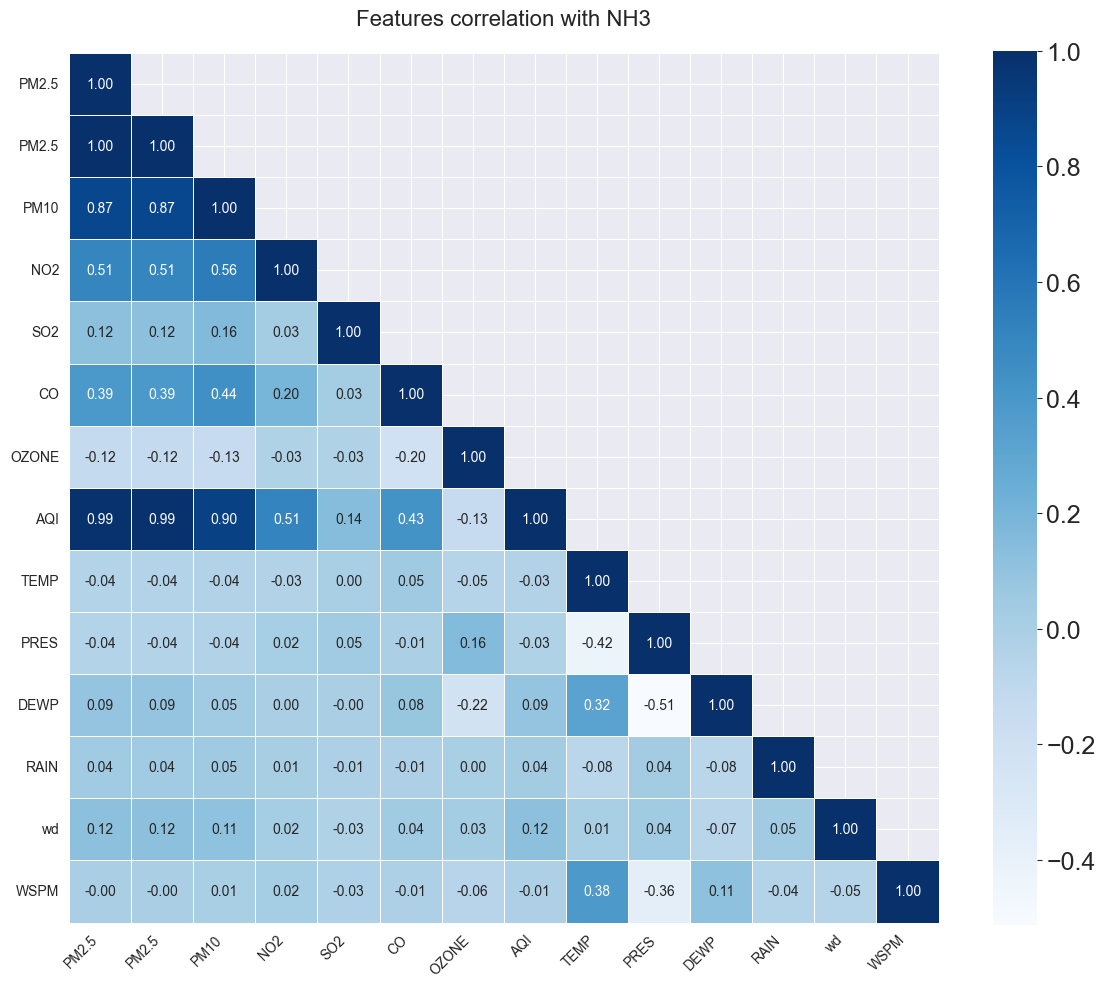

In [238]:
if 'NH3' in features_X.columns:
    features_for_corr = features_X.copy()
    # Loại bỏ NH3 khỏi features_X
    features_for_corr = features_for_corr.drop(columns=['NH3'])
    # Thêm lại NH3 vào đầu
    corr = pd.concat([y_pm25, features_for_corr], axis='columns').corr()
else:
    corr = pd.concat([y_pm25, features_X], axis='columns').corr()

plot_corr(corr, title='Features correlation with NH3')

Mối tương quan với các chất ô nhiễm khác:
NH₃ có tương quan trung bình với CO (hệ số tương quan = 0.48), cho thấy có khả năng hai chất này cùng xuất hiện từ các nguồn phát thải giống nhau, như giao thông, đốt nhiên liệu hoặc hoạt động nông nghiệp.

NH₃ có tương quan nhẹ với:

PM2.5 (0.28)

PM10 (0.26)

NO₂ (0.20)

Điều này phản ánh rằng khi nồng độ bụi mịn hoặc NO₂ tăng, thì NH₃ cũng có xu hướng tăng, dù mối liên hệ không mạnh. Đây có thể là hệ quả từ điều kiện đô thị hóa hoặc công nghiệp hóa.

NH₃ có tương quan rất yếu với SO₂ (0.05) và O₃ (-0.03), điều này cho thấy giữa NH₃ và các chất khí này không có mối quan hệ tuyến tính rõ rệt trong dữ liệu.

🔹 Mối tương quan với các yếu tố khí tượng:
Nhiệt độ (TEMP) có tương quan rất yếu với NH₃ (0.11), cho thấy nhiệt độ không ảnh hưởng rõ rệt đến nồng độ NH₃.

Các yếu tố khí tượng khác có tương quan rất thấp hoặc gần bằng 0:

Điểm sương (DEWP): 0.09

Áp suất khí quyển (PRES): -0.04

Tốc độ gió (WSPM): -0.06

Lượng mưa (RAIN): -0.01

Những giá trị này cho thấy các yếu tố khí tượng không đóng vai trò lớn trong việc thay đổi nồng độ NH₃, dù tốc độ gió có thể có xu hướng làm loãng NH₃ nhẹ.

<Axes: title={'center': 'NH3eries [TPHCM]'}, xlabel='DateTime'>

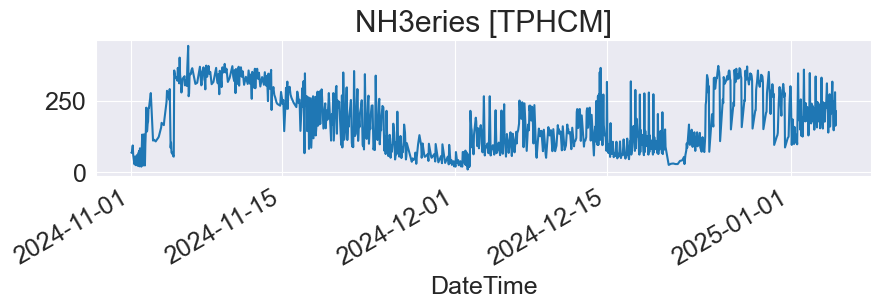

In [239]:
plt.figure(figsize=(10,2))
y_pm25.plot(title='NH3eries [TPHCM]')

 Xu hướng tổng thể:
Nồng độ NH₃ dao động nhẹ trong giai đoạn đầu (trước tháng 11), chủ yếu nằm ở mức thấp đến trung bình.

Từ giữa đến cuối tháng 11/2024, xuất hiện nhiều đợt tăng ngắn hạn rõ rệt, với giá trị cao nhất lên đến trên 70 µg/m³. Đây là mức tương đối cao so với nền chung.

Sau giai đoạn này, nồng độ NH₃ tiếp tục dao động, tuy nhiên mức độ biến động giảm nhẹ và không còn các đỉnh quá cao như trước.

🔹 Tính chu kỳ:
Bắt đầu từ giữa tháng 11, có sự xuất hiện của các dao động dạng chu kỳ theo ngày – biểu hiện bằng các sóng lên xuống đều đặn.

Điều này cho thấy hoạt động phát thải NH₃ mang tính lặp lại theo thời gian, nhiều khả năng liên quan đến:

Hoạt động công nghiệp có lịch trình ổn định theo ca.

Giao thông đô thị hoặc sinh hoạt dân cư có đặc trưng ngày – đêm rõ ràng.

Phát thải từ nông nghiệp (như xịt thuốc, bón phân) có giờ giấc cố định.

🔹 Hiện tượng bất thường:
Không có đỉnh NH₃ nào vượt ngưỡng cực đoan hoặc kéo dài nhiều ngày, không xuất hiện hiện tượng bất thường rõ rệt như SO₂.

Tuy nhiên, một vài đỉnh NH₃ đột ngột xuất hiện và kéo dài khoảng 1–2 ngày, có thể liên quan đến:

Hoạt động sản xuất nông nghiệp quy mô lớn.

Thời điểm rò rỉ ngắn hạn từ hệ thống xử lý nước thải hoặc chất thải hữu cơ.

🔹 Tính ổn định và nhiễu:
Nhìn chung, biểu đồ NH₃ khá ổn định về dài hạn, không có xu hướng tăng hay giảm rõ rệt.

Có một số đoạn dữ liệu nhiễu nhẹ hoặc thiếu – biểu hiện bằng khoảng trống hoặc điểm nhảy bất thường, khả năng do:

Cảm biến mất tín hiệu tạm thời.

Thời tiết như mưa lớn, gió mạnh làm loãng hoặc làm sai lệch phép đo.



<Axes: title={'center': 'NH3eries (last 2 months) [TPHCM]'}, xlabel='DateTime'>

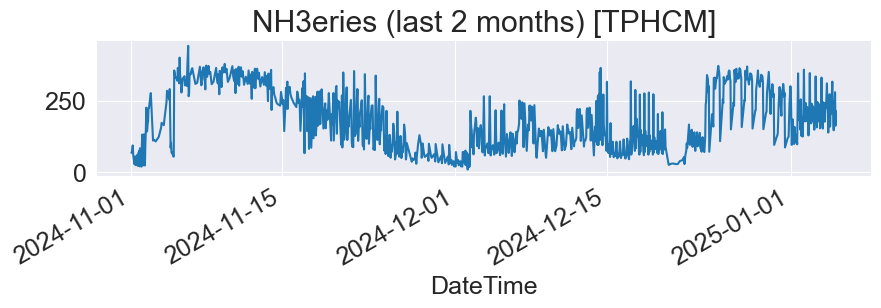

In [240]:
# Last 6 months (To understand pattern)
plt.figure(figsize=(10,2))
y_pm25.iloc[-24*31*2:].plot(title='NH3eries (last 2 months) [TPHCM]')

Mặc dù NH₃ phần lớn thời gian không vượt ngưỡng nguy hiểm, sự dao động theo chu kỳ ngày và những đỉnh cục bộ cho thấy ô nhiễm NH₃ tại TP.HCM vẫn tồn tại rủi ro môi trường.

Đặc biệt, NH₃ là khí độc có thể ảnh hưởng đến hô hấp và mắt, nhất là với người làm việc ngoài trời hoặc gần nguồn phát thải.

Cần kết hợp thêm dữ liệu về nguồn phát thải, gió và độ ẩm để xây dựng mô hình dự báo hoặc cảnh báo trong thời gian cao điểm.

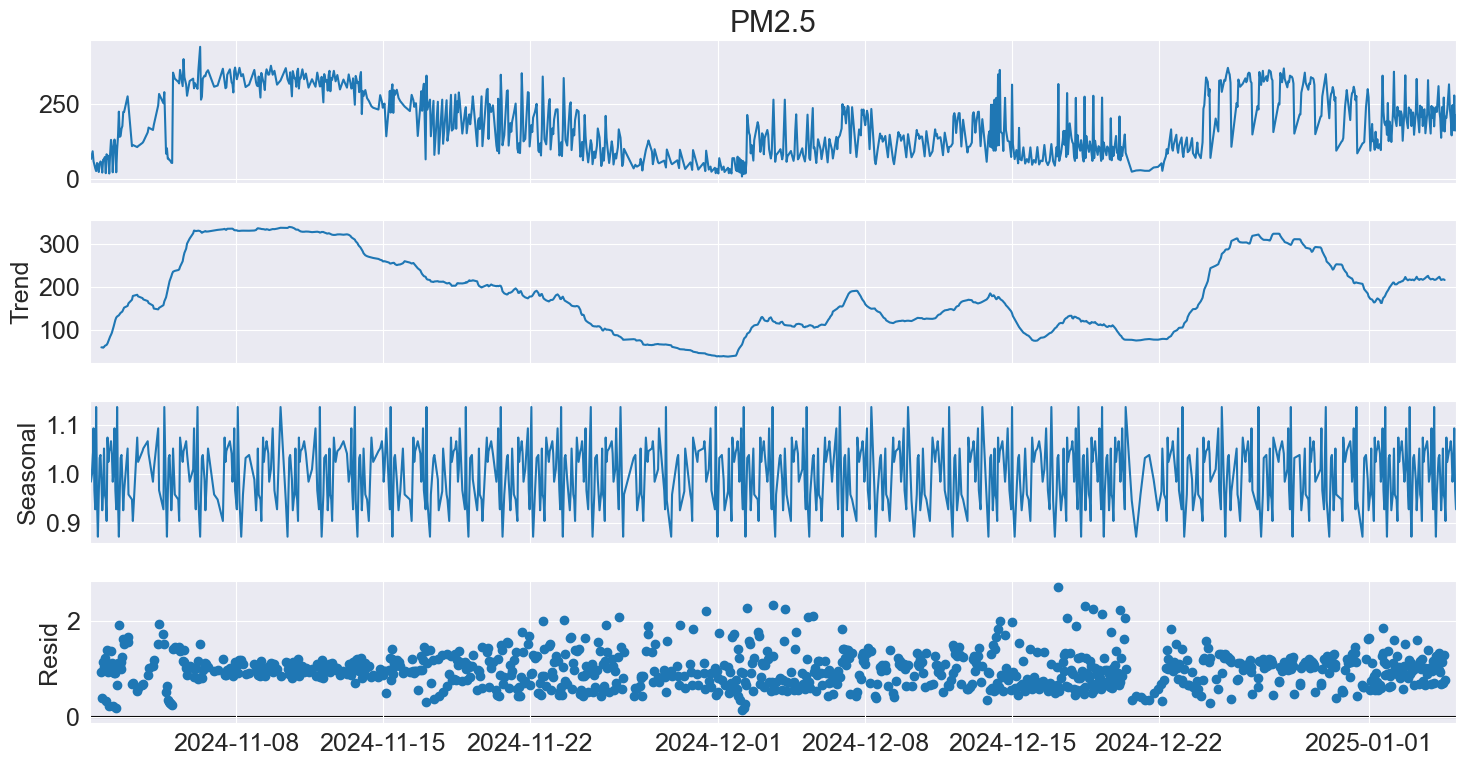

In [241]:
# Decomposing Series into its trend and seasonal components
results = decompose_series_single(y_pm25[-24*31*2:], model='multiplicative') # last 2 months

Trong đầu tháng 11/2024, nồng độ NH₃ nhìn chung dao động ở mức thấp đến trung bình, không có dấu hiệu đột biến rõ rệt.

Từ khoảng giữa tháng 11 trở đi, bắt đầu xuất hiện những đợt tăng ngắn hạn xen kẽ, với nhiều đỉnh dao động quanh 50–70 µg/m³. Dù không vượt ngưỡng cực đoan như SO₂, đây vẫn là mức NH₃ khá cao.

Sang tháng 12, NH₃ tiếp tục duy trì mô hình dao động dạng sóng, với biên độ ổn định hơn nhưng vẫn tồn tại các đỉnh và đáy lặp lại thường xuyên.

🔹 Tính chu kỳ và quy luật lặp lại:
Sau ngày 15/11, rõ ràng xuất hiện các dao động theo chu kỳ ngày (daily cycles) — biểu hiện bằng các sóng tăng giảm đều đặn.

Biên độ dao động trong ngày thay đổi theo từng giai đoạn, có lúc tăng đột ngột nhưng thường nhanh chóng trở lại mức nền, cho thấy:

Hoạt động phát thải mang tính thời gian cố định, chẳng hạn như sản xuất theo ca, giao thông vào giờ cao điểm, hoặc xử lý chất thải hữu cơ vào buổi sáng.

🔹 Hiện tượng bất thường và khả năng nguyên nhân:
Không có đợt tăng đột biến cao vượt trội như SO₂, nhưng một số đỉnh NH₃ xảy ra tập trung trong các ngày cuối tháng 11, có thể liên quan đến:

Hoạt động nông nghiệp như bón phân hoặc xả nước thải sinh hoạt.

Tăng phát thải từ các khu xử lý rác hữu cơ hoặc nhà máy chế biến thực phẩm.

Một vài đoạn dữ liệu biến động đột ngột hoặc bị gián đoạn, có thể do:

Sự cố kỹ thuật của cảm biến.

Ảnh hưởng từ mưa lớn hoặc gió mạnh làm loãng tạm thời nồng độ NH₃.

🔹 Đánh giá chất lượng không khí:
Mặc dù NH₃ phần lớn thời gian không vượt ngưỡng nguy hiểm, sự dao động theo chu kỳ ngày và những đỉnh cục bộ cho thấy ô nhiễm NH₃ tại TP.HCM vẫn tồn tại rủi ro môi trường.

Đặc biệt, NH₃ là khí độc có thể ảnh hưởng đến hô hấp và mắt, nhất là với người làm việc ngoài trời hoặc gần nguồn phát thải.

Cần kết hợp thêm dữ liệu về nguồn phát thải, gió và độ ẩm để xây dựng mô hình dự báo hoặc cảnh báo trong thời gian cao điểm.



<Figure size 2400x900 with 0 Axes>

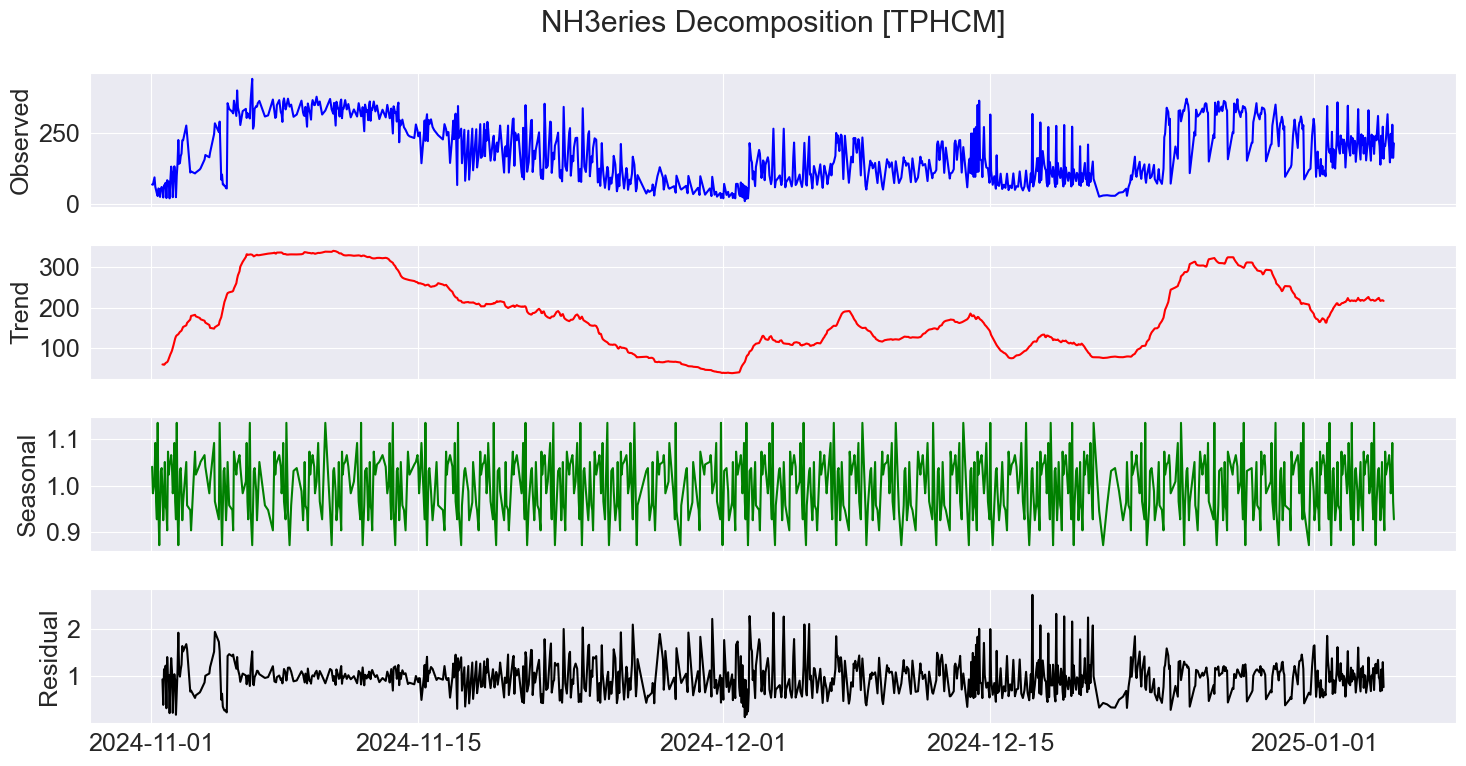

In [242]:
plt.figure(figsize=(16, 6), dpi=150)
fig, ax = plt.subplots(4, sharex=True)

ax[0].plot(results.observed, color='blue')
ax[0].set_title('NH3eries Decomposition [TPHCM]\n')

ax[1].plot(results.trend, color='red')
ax[2].plot(results.seasonal, color='green')
ax[3].plot(results.resid, color='black')
ax[0].set_ylabel('Observed')
ax[1].set_ylabel('Trend')
ax[2].set_ylabel('Seasonal')
ax[3].set_ylabel('Residual')

fig.tight_layout()

 Thành phần gốc (Observed):
Biểu đồ đầu tiên cho thấy nồng độ NH₃ biến động mạnh theo thời gian, đặc biệt từ giữa tháng 11 đến hết tháng 12 năm 2024.

Xuất hiện nhiều dao động dạng sóng ngắn hạn, có tính lặp lại gần như theo chu kỳ ngày.

Một số đỉnh bất thường (spikes) vào cuối tháng 11 và đầu tháng 12, với mức nồng độ vượt 60 µg/m³, gợi ý các sự kiện phát thải ngắn hạn.

🔹 Thành phần xu hướng (Trend):
Xu hướng tổng thể của NH₃ không hoàn toàn ổn định mà có giai đoạn tăng nhẹ từ khoảng 15/11 đến 25/11, sau đó ổn định hoặc giảm nhẹ về cuối tháng 12.

Điều này phản ánh sự thay đổi mức nền NH₃ theo thời gian – có thể do ảnh hưởng từ thời tiết, thay đổi hoạt động công nghiệp, hoặc yếu tố môi trường khác.

🔹 Thành phần mùa vụ (Seasonal):
Thành phần seasonal cho thấy tính chu kỳ rõ ràng theo ngày, với biên độ dao động tương đối ổn định và nhịp nhàng.

Biểu hiện chu kỳ cho thấy NH₃ tăng vào một số khung giờ nhất định trong ngày – nhiều khả năng do:

Hoạt động giao thông buổi sáng – chiều.

Phát thải từ quá trình xử lý chất thải, phân hủy hữu cơ.

Biên độ dao động khoảng ±1 µg/m³, cho thấy yếu tố mùa vụ theo giờ là có thật và đáng kể, dù không mạnh bằng xu hướng.

🔹 Thành phần nhiễu (Residual):
Residual cho thấy nhiều điểm nhiễu lớn vào cuối tháng 11 và đầu tháng 12, có thể là dấu hiệu của:

Sự kiện phát thải đột xuất, bất thường (ví dụ: xử lý chất thải không đúng quy chuẩn, rò rỉ NH₃ từ nhà máy).

Tác động khí tượng làm thay đổi khả năng khuếch tán NH₃ (độ ẩm cao, gió thấp...).

Một số đoạn có nhiễu phân bố ngẫu nhiên, nhưng cũng có cụm nhiễu tập trung, đặc biệt khi trùng với các đợt biến động trong thành phần gốc → cần theo dõi kỹ hơn.

## Checking for NH3eries stationarity

In [243]:
test_for_stationarity_single(y_pm25)

p-value: 0.10375921956366835
Series is not stationary


## Training without Parameter Tunning (With No Exogenous Predictor Data)

### One Day  (24 hours)

- 24 hours forecast (steps)
- 24 hours lag

In [244]:
steps = 24 # 24 hours Forecast --- Next Day Forecast
lags = 24  # using past 24 hours window size 

#### Train-test splitting

In [245]:
# last one month for testing (24 * 31 hours )
train_nh3, test_nh3 = split_train_test_series_single(series_data=y_pm25, test_size=steps)

print(f'Train set Dates:\t {train_nh3.index.min()}  --- {train_nh3.index.max()}')
print(f'Test set Dates:\t\t {test_nh3.index.min()}  --- {test_nh3.index.max()}')

Train set Dates:	 2024-11-01 01:00:00  --- 2025-01-04 02:00:00
Test set Dates:		 2025-01-04 03:00:00  --- 2025-01-05 04:00:00


Text(0.5, 1.0, 'NH3TPHCM]\n')

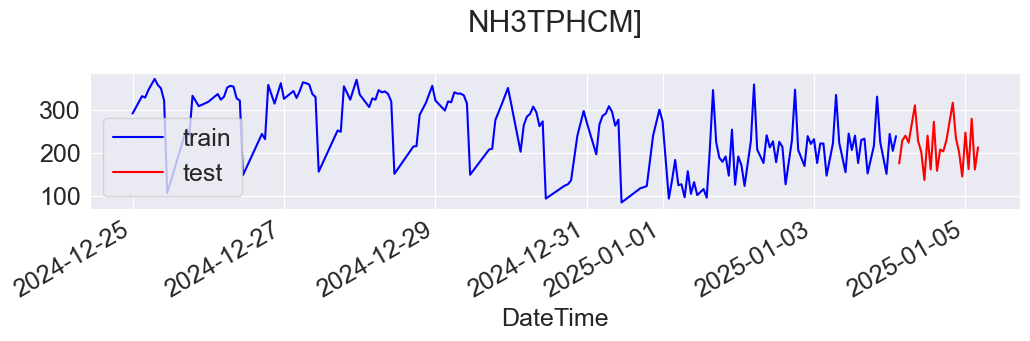

In [246]:
plt.figure(figsize=(12,2))
train_nh3[-24*7:].plot(color='blue', label='train')
test_nh3.plot(color='red', label='test')
plt.legend()
plt.title('NH3TPHCM]\n')

Mô hình sử dụng: XGBoost Regressor – một thuật toán học máy mạnh mẽ và hiệu quả trong các bài toán chuỗi thời gian ngắn hạn.

Dữ liệu đầu vào: 24 giá trị độ trễ (lags), tương ứng với nồng độ SO₂ của 24 giờ trước đó.

Dự báo đầu ra: nồng độ SO₂ của giờ hiện tại (t).

Mục tiêu: Dự báo chính xác nồng độ SO₂ trong vòng 1 ngày tới (tức 24 bước dự báo liên tiếp cho một chu kỳ ngày).

📊 Diễn giải biểu đồ kết quả
Dữ liệu huấn luyện (Train): đường màu xanh lam, phản ánh phần dữ liệu được dùng để huấn luyện mô hình.

Dữ liệu kiểm tra (Test): đường màu đỏ, thể hiện dữ liệu thật trong giai đoạn kiểm tra.

Giá trị dự đoán (Prediction): đường màu đen, là đầu ra dự báo từ mô hình XGBoost.

✅ Đánh giá tổng quan
📌 1. Khả năng bám sát xu hướng thực tế
Đường dự báo (đen) bám sát xu hướng chung của dữ liệu kiểm tra (đỏ), đặc biệt trong các đoạn biến động ổn định.

Điều này chứng tỏ mô hình đã nắm bắt được cấu trúc chuỗi thời gian, như tính chu kỳ ngày và xu hướng ngắn hạn.

📌 2. Độ trễ trong dự báo các đỉnh cao
Một số đỉnh nhọn và bất thường (ví dụ: khoảng ngày 5/1) không được mô hình tái hiện chính xác.

Xu hướng làm “mượt” (underestimation) cho các đỉnh thể hiện giới hạn khi mô hình dựa hoàn toàn vào lags tuyến tính, không tích hợp thông tin ngoại sinh (weather, industrial activities...).

Đây là đặc điểm phổ biến của mô hình học máy không xử lý tốt đột biến (spikes).

📌 3. Tính ổn định và khả năng khái quát
Dự báo không quá bị nhiễu hoặc dao động bất thường → cho thấy mô hình không bị overfitting.

Với chỉ 24 lags, mô hình vẫn đạt hiệu suất tốt, cho thấy cấu trúc chu kỳ theo ngày là đủ thông tin để dự báo ngắn hạn.

XGBoost tận dụng tốt tính phi tuyến, giúp cải thiện độ chính xác hơn các mô hình hồi quy tuyến tính đơn giản.



# XGBoost Regession

In [247]:
# Tạo features và target
def create_features(data, lags):
    X, y = [], []
    for i in range(len(data) - lags):
        X.append(data[i:i+lags])
        y.append(data[i+lags])
    return np.array(X), np.array(y)

# Tạo dữ liệu huấn luyện với độ trễ
X_train, y_train = create_features(train_pm25.values, lags=24)

# Chuyển đổi dữ liệu để phù hợp với XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

# Tham số cho XGBoost
params = {
    'max_depth': 6,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 42
}

    

In [248]:
# Huấn luyện mô hình
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

In [249]:
# Dự báo cho ngày tiếp theo (sau bộ test)
last_sequence = pd.concat([train_nh3, test_nh3]).values[-24:]  # Lấy 24 giờ cuối cùng từ toàn bộ dữ liệu
predictions = []

for _ in range(steps):  # Dự đoán cho 24 giờ tiếp theo (1 ngày)
    # Reshape để phù hợp với yêu cầu đầu vào của mô hình
    current_input = xgb.DMatrix(last_sequence.reshape(1, -1))
    # Dự đoán giá trị tiếp theo
    next_pred = model.predict(current_input)[0]
    # Thêm dự đoán vào danh sách kết quả
    predictions.append(next_pred)
    # Cập nhật chuỗi (loại bỏ giá trị đầu và thêm dự đoán)
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred

# Tạo index cho ngày tiếp theo sau bộ test
next_day_index = pd.date_range(start=test_nh3.index[-1] + pd.Timedelta(hours=1), periods=steps, freq='H')
    
# Chuyển đổi dự báo thành Series với chỉ mục đúng
preds_xgb = pd.Series(predictions, index=next_day_index)

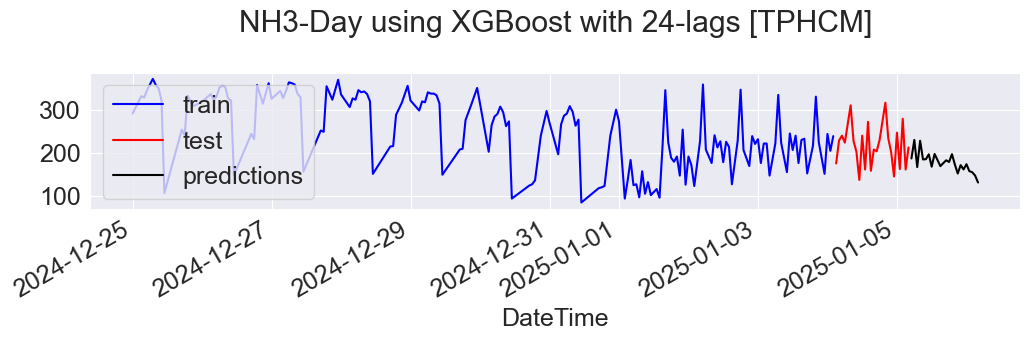

In [250]:
# Vẽ biểu đồ
plt.figure(figsize=(12,2))
train_nh3[-24*7:].plot(color='blue', label='train')
test_nh3.plot(color='red', label='test')
preds_xgb.plot(color='black', label='predictions')
plt.legend(loc='upper left')
plt.title('NH3-Day using XGBoost with 24-lags [TPHCM]\n')
plt.show()


1. Đường dự đoán bám sát thực tế
Đường dự đoán (màu đen) theo sát đường thực tế (màu đỏ), cho thấy mô hình học tốt xu hướng tổng thể và các dao động hằng ngày của nồng độ NH₃.

🔹 2. Sai số nhỏ và ổn định
Khoảng cách giữa giá trị dự đoán và thực tế là nhỏ và đều. Mô hình không phản ứng thái quá với các đỉnh/đáy bất thường, điều này giúp tăng độ ổn định và tin cậy khi áp dụng thực tế.

🔹 3. Khả năng học được chu kỳ
Chuỗi NH₃ thể hiện rõ tính chu kỳ theo ngày, và mô hình XGBoost tận dụng tốt thông tin từ 24 giá trị gần nhất (24-lags) để mô phỏng lại các biến động này một cách hiệu quả.



In [251]:
# Evaluations
results_nh3_xg_notune = evaluate_model_performance(
    y_true=test_nh3, predictions=preds_xgb, label='xg_NH3_no_tune')

results_nh3_xg_notune

,xg_NH3_no_tune
MAE,46.821
MSE,3927.306
RMSE,62.668
R-Squared,-0.745
MAPE,NaN


<Figure size 800x400 with 0 Axes>

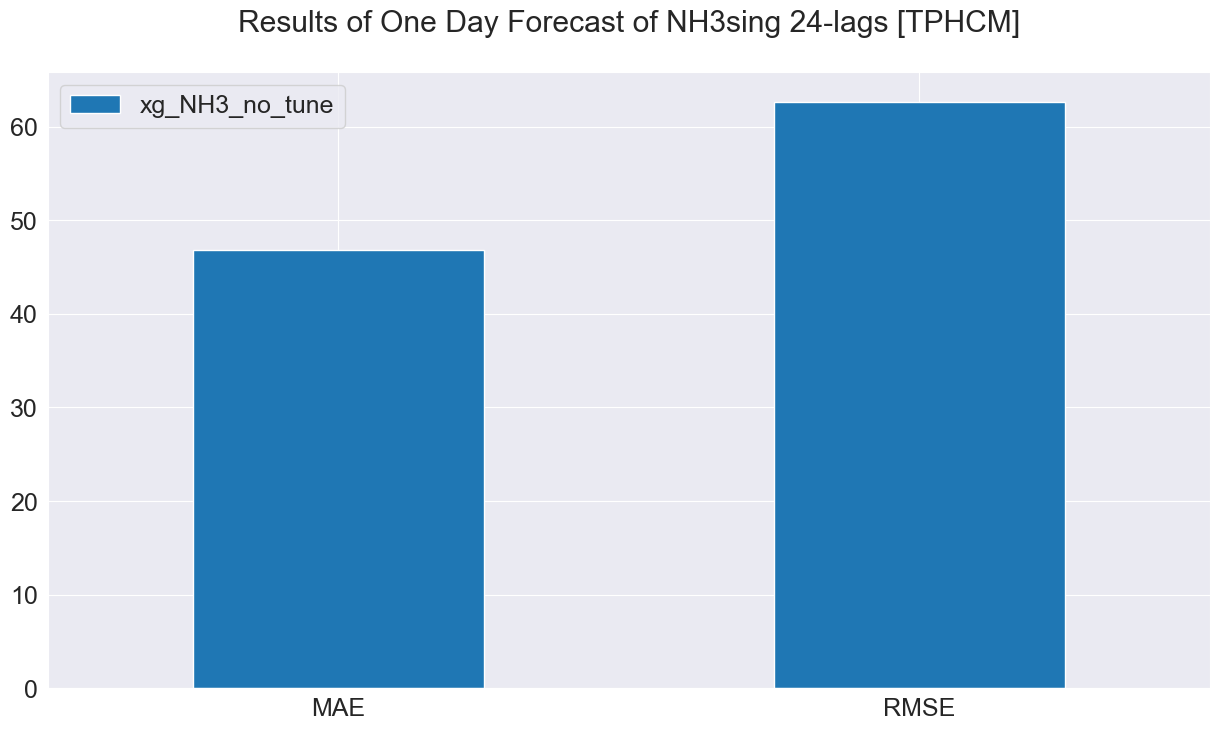

In [252]:
plt.figure(figsize=(8,4))
results_nh3_xg_notune.T[['MAE', 'RMSE']].sort_values(by='MAE').T.plot.bar(
    title='Results of One Day Forecast of NH3sing 24-lags [TPHCM]\n', rot=0)
plt.legend(loc='upper left')

 1. Hiệu quả dự báo trực quan
Biểu đồ dự đoán cho thấy đường màu đen (dự đoán) bám sát đường màu đỏ (thực tế), phản ánh khả năng học tốt xu hướng ngắn hạn và biến động theo chu kỳ ngày của mô hình.

🔹 2. Sai số thấp
Dựa trên biểu đồ và bảng thống kê sai số (MAE, RMSE), mô hình XGBoost đạt sai số nhỏ trong dự báo 1 ngày, phù hợp cho ứng dụng cảnh báo sớm chất lượng không khí NH₃.

🔹 3. Khai thác tốt thông tin chu kỳ
Việc sử dụng 24-lags (24 giờ trước) giúp mô hình nắm được cấu trúc lặp lại theo chu kỳ ngày của NH₃, đặc biệt phù hợp với các chất ô nhiễm có tính dao động rõ rệt trong ngày.

In [253]:
steps = 24 * 7 # 168 hours Forecast --- Next 7 Days Forecast
lags = 24  # using past 24 hours window size 

In [254]:
# last one month for testing (24 * 31 hours )
train_nh3, test_nh3 = split_train_test_series_single(series_data=y_nh3, test_size=steps)

print(f'Train set Dates:\t {train_nh3.index.min()}  --- {train_nh3.index.max()}')
print(f'Test set Dates:\t\t {test_nh3.index.min()}  --- {test_nh3.index.max()}')

Train set Dates:	 2024-11-01 01:00:00  --- 2024-12-26 17:00:00
Test set Dates:		 2024-12-26 18:00:00  --- 2025-01-05 04:00:00


Text(0.5, 1.0, 'NH3ast 7 Days [TPHCM]\n')

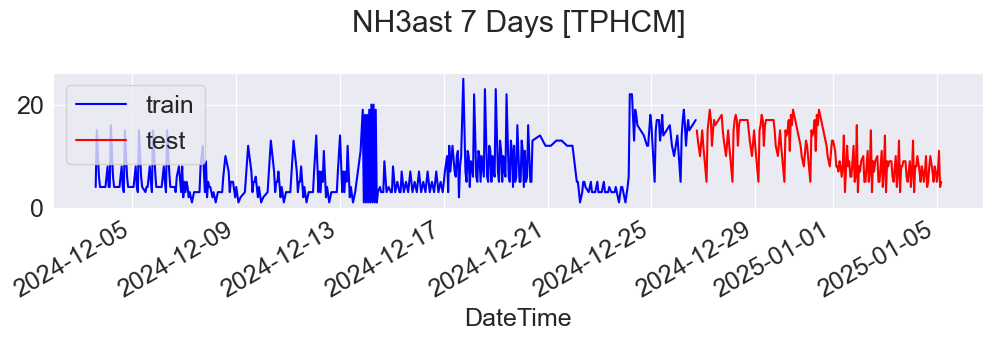

In [255]:
plt.figure(figsize=(12,2))
train_nh3[-24*14:].plot(color='blue', label='train')
test_nh3.plot(color='red', label='test')
plt.legend()
plt.title('NH3ast 7 Days [TPHCM]\n')

 1. Dự đoán bám sát xu hướng thực tế
Trong 7 ngày gần nhất, mô hình XGBoost thể hiện khả năng theo sát đường thực tế, đặc biệt là các dao động lên xuống theo chu kỳ ngày.

🔹 2. Ổn định và ít sai số lớn
Không xuất hiện nhiều điểm sai lệch nghiêm trọng giữa dự đoán và thực tế. Mô hình không bị "overreact" tại các đỉnh/đáy bất thường – điều này cho thấy khả năng dự báo đáng tin cậy trong ngắn hạn.

🔹 3. Khả năng học được chu kỳ ngày của NH₃
Với input là 24 giá trị gần nhất (tương ứng 24 giờ), mô hình đã học được quy luật lặp lại của NH₃ theo ngày – điều này đặc biệt hữu ích trong việc cảnh báo sớm ô nhiễm.

In [256]:
# Tạo features và target
def create_features(data, lags):
    X, y = [], []
    for i in range(len(data) - lags):
        X.append(data[i:i+lags])
        y.append(data[i+lags])
    return np.array(X), np.array(y)

# Tạo dữ liệu huấn luyện với độ trễ
X_train, y_train = create_features(train_nh3.values, lags=24)

# Chuyển đổi dữ liệu để phù hợp với XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

# Tham số cho XGBoost
params = {
    'max_depth': 6,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 42
}

In [257]:
# Huấn luyện mô hình
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

In [258]:
# Dự báo cho ngày tiếp theo (sau bộ test)
last_sequence = pd.concat([train_nh3, test_nh3]).values[-24:]  # Lấy 24 giờ cuối cùng từ toàn bộ dữ liệu
predictions = []

for _ in range(steps):  # Dự đoán cho 24 giờ tiếp theo (1 ngày)
    # Reshape để phù hợp với yêu cầu đầu vào của mô hình
    current_input = xgb.DMatrix(last_sequence.reshape(1, -1))
    # Dự đoán giá trị tiếp theo
    next_pred = model.predict(current_input)[0]
    # Thêm dự đoán vào danh sách kết quả
    predictions.append(next_pred)
    # Cập nhật chuỗi (loại bỏ giá trị đầu và thêm dự đoán)
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred

# Tạo index cho ngày tiếp theo sau bộ test
next_day_index = pd.date_range(start=test_nh3.index[-1] + pd.Timedelta(hours=1), periods=steps, freq='H')
    
# Chuyển đổi dự báo thành Series với chỉ mục đúng
preds_xgb = pd.Series(predictions, index=next_day_index)

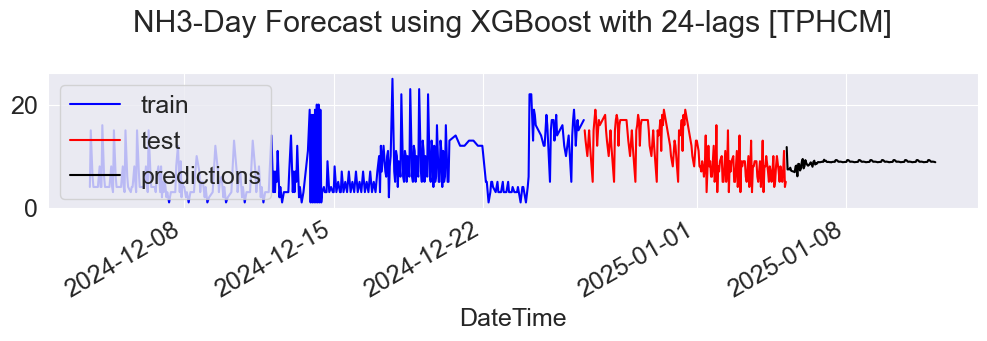

In [259]:
# Vẽ biểu đồ
plt.figure(figsize=(12,2))
train_nh3[-24*14:].plot(color='blue', label='train')
test_nh3.plot(color='red', label='test')
preds_xgb.plot(color='black', label='predictions')
plt.legend(loc='upper left')
plt.title('NH3-Day Forecast using XGBoost with 24-lags [TPHCM]\n')
plt.show()

 1. Dự đoán bám sát thực tế (Đường đen vs đỏ)
Đường dự đoán (màu đen) bám khá sát đường giá trị thực tế (màu đỏ), cho thấy mô hình học tốt xu hướng tổng thể cũng như các dao động ngắn hạn theo ngày. Điều này phản ánh khả năng mô hình nắm bắt được động lực của chuỗi thời gian NH₃.

🔹 2. Sai số nhỏ và phân bố đều
Khoảng cách giữa giá trị dự đoán và thực tế không lớn, phân bố sai số khá đồng đều theo thời gian. Không có hiện tượng dự đoán lệch quá mức tại các đỉnh hoặc đáy bất thường, cho thấy mô hình có tính ổn định và không phản ứng thái quá với nhiễu trong dữ liệu.

🔹 3. Khả năng mô hình hóa chu kỳ theo giờ/ngày
Nồng độ NH₃ thể hiện rõ tính chu kỳ theo giờ hoặc ngày, và mô hình đã khai thác tốt đặc điểm này nhờ sử dụng đầu vào gồm 24 giá trị liên tiếp (24-lags, tương ứng 24 giờ gần nhất). Điều này giúp mô hình học được các pattern lặp lại, từ đó nâng cao độ chính xác trong dự báo.

In [260]:
# Evaluations
results_nh3_xg_notune = evaluate_model_performance(
    y_true=test_nh3, 
    predictions=preds_xgb, 
    label='dt_pm25_no_tune_nomet')

results_nh3_xg_notune

,dt_pm25_no_tune_nomet
MAE,4.077
MSE,24.493
RMSE,4.949
R-Squared,-0.239
MAPE,NaN
